## Oil Viscosity Determination in Python
Input parameters and their values:
Pressure (p) = 4475
Temperature (t) = 140
Bubble Point Pressure (pb) = 2745
Solution gas oil ratio (Rs) = 600
Gas specific gravity (Gsg) = 1
Stock tank oil gravity (API) = 35

In [2]:
from math import sqrt   #imported square root function from mathemathe

def oil_viscosity_standingMethod():
    
    """input our needed parameters"""
    p = float(input("Pressure (p): "))
    t = float(input("Temperature (t): "))
    pb = float(input("Bubble Point Pressure (pb): "))
    Rs = float(input("Solution gas oil ratio (Rs): "))
    Gsg = float(input("Gas specific gravity (Gsg): "))
    API = float(input("Stock tank oil gravity (API): "))
    
    """determine our Oil specific gravity and Oil density"""
    Osg = ((141.5)/(API + 131.5))
    OD = (62.4*(Osg) + 0.0136*Rs*Gsg)/(0.972 + 0.000147*(Rs*sqrt(Gsg/Osg)+1.25*t)**1.175)
    
    """obtain the dead oil viscosity and the saturated oil viscosity quantities"""
    A = 10**(0.43+(8.33/API))
    Uod = (0.32 + (18000000/(API**4.53))) * ((360/(t+200))**A)
    a = Rs*((2.2*(10**-7)*Rs) - (7.4*(10**-4)))
    c = 8.62*(10**-5) * Rs
    d = 1.10 * (10**-3) * Rs
    e = 3.74 * (10**-3) * Rs
    b = ((0.68)/10**c) + ((0.25)/10**d) + ((0.062)/10**e)
    Uob = (10**a) * (Uod**b)
    
    """determine the oil viscosity"""
    Uo = Uob + 0.001*(p-pb)*(0.024*(Uob**1.6) + 0.38*(Uob**0.56))
    
    
    return f'Oil viscosity: {round(Uo, 4)} cp' #the rsult is disp

oil_viscosity_standingMethod()

Pressure (p): 4475
Temperature (t): 140
Bubble Point Pressure (pb): 2745
Solution gas oil ratio (Rs): 600
Gas specific gravity (Gsg): 1
Stock tank oil gravity (API): 35


'Oil viscosity: 1.4819 cp'

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('fluid.txt', sep='\t')

In [10]:
df.head()

,Temperature (K),Pressure (MPa),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/MPa),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase
0,273.16,0.000000,0.000000,infinite,4.279300e+01,45.064000,-1.000000e+07,25.176,33.491,409.51,undefined,8.9480,0.016765,vapor
1,273.16,0.000612,0.000269,3711.0,4.278500e+01,45.055000,1.649400e+02,25.553,33.947,409.00,592.65,8.9458,0.016761,vapor
2,273.16,0.000612,55.497000,0.018019,-1.516900e-12,0.000011,-5.316900e-12,75.978,76.023,1402.30,-0.24142,1791.4000,0.555600,liquid
3,273.16,1.666700,55.544000,0.018004,5.436000e-04,0.030550,1.943600e-03,75.838,75.875,1404.90,-0.24127,1787.7000,0.556860,liquid
4,273.16,3.333300,55.591000,0.017989,1.060100e-03,0.061022,3.695900e-03,75.699,75.729,1407.60,-0.24113,1784.0000,0.558120,liquid


In [11]:
df = df.iloc[2:,:]

In [14]:
df.shape

(378, 14)

In [15]:
temp_visco = df[['Temperature (K)', 'Viscosity (uPa*s)']]

In [16]:
temp_visco.columns = ['Temperature', 'Viscosity']

In [17]:
temp_visco

,Temperature,Viscosity
2,273.16,1791.4
3,273.16,1787.7
4,273.16,1784.0
5,273.16,1780.4
6,273.16,1776.9
...,...,...
375,273.16,2450.9
376,273.16,2455.6
377,273.16,2460.3
378,273.16,2465.0


Text(0, 0.5, 'Viscosity (uPa*s)')

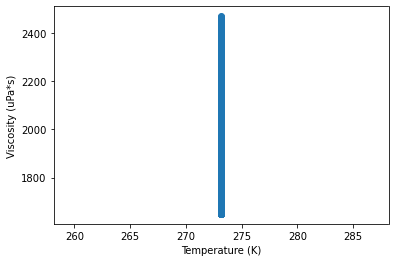

In [18]:
plt.scatter(temp_visco['Temperature'],temp_visco['Viscosity'])
plt.xlabel('Temperature (K)')
plt.ylabel('Viscosity (uPa*s)')

In [19]:
temp_visco['Temperature'].describe()

count    3.780000e+02
mean     2.731600e+02
std      2.333669e-12
min      2.731600e+02
25%      2.731600e+02
50%      2.731600e+02
75%      2.731600e+02
max      2.731600e+02
Name: Temperature, dtype: float64

In [20]:
temp_visco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 2 to 379
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  378 non-null    float64
 1   Viscosity    378 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [21]:
import seaborn as sns

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

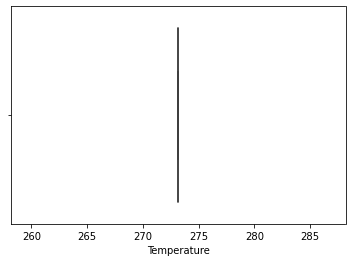

In [22]:
sns.boxplot(temp_visco['Temperature'])

In [23]:
temp_visco['Viscosity'].describe()

count     378.000000
mean     1891.831481
std       244.918516
min      1649.500000
25%      1683.775000
50%      1785.750000
75%      2068.575000
max      2469.800000
Name: Viscosity, dtype: float64

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Viscosity'>

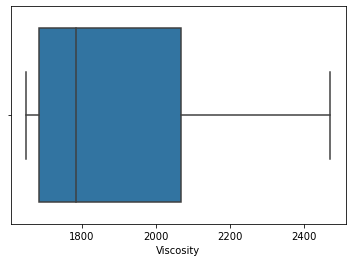

In [24]:
sns.boxplot(temp_visco['Viscosity'])

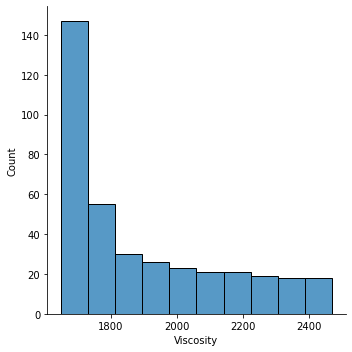

In [25]:
sns.displot(temp_visco['Viscosity'])

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

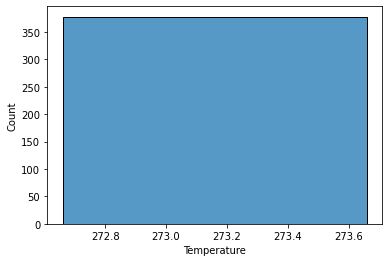

In [26]:
sns.histplot(temp_visco['Temperature'])

In [27]:
X = temp_visco['Temperature'].values.reshape(-1, 1)
y = temp_visco['Viscosity'].values.reshape(-1, 1)

In [28]:
temp_visco.head()

,Temperature,Viscosity
2,273.16,1791.4
3,273.16,1787.7
4,273.16,1784.0
5,273.16,1780.4
6,273.16,1776.9


In [29]:
temp = temp_visco['Temperature'].to_numpy()

In [30]:
temp_visco['Temperature'].unique()

array([273.16])

In [31]:
visco_density = df[['Viscosity (uPa*s)', 'Density (mol/l)']]

In [32]:
visco_density

,Viscosity (uPa*s),Density (mol/l)
2,1791.4,55.497
3,1787.7,55.544
4,1784.0,55.591
5,1780.4,55.637
6,1776.9,55.684
...,...,...
375,2450.9,65.898
376,2455.6,65.916
377,2460.3,65.934
378,2465.0,65.952


In [33]:
visco_density.columns = ['Viscosity', 'Density']

In [34]:
visco_density

,Viscosity,Density
2,1791.4,55.497
3,1787.7,55.544
4,1784.0,55.591
5,1780.4,55.637
6,1776.9,55.684
...,...,...
375,2450.9,65.898
376,2455.6,65.916
377,2460.3,65.934
378,2465.0,65.952


Text(0, 0.5, 'Density (mol/l)')

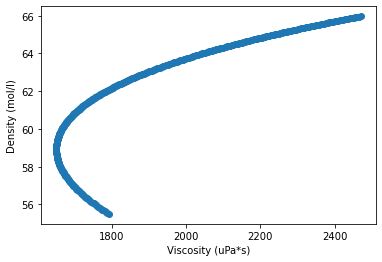

In [35]:
plt.scatter(visco_density['Viscosity'],visco_density['Density'])
plt.xlabel('Viscosity (uPa*s)')
plt.ylabel('Density (mol/l)')

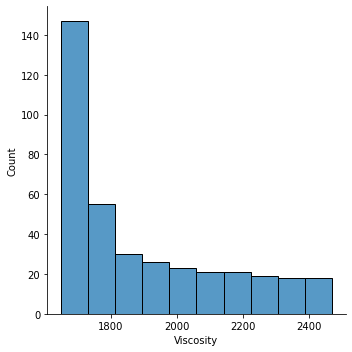

In [36]:
sns.displot(visco_density['Viscosity'])

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Viscosity'>

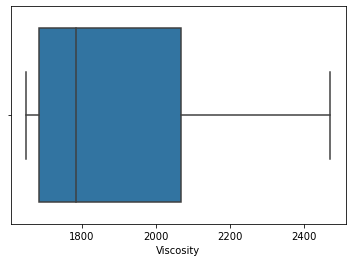

In [37]:
sns.boxplot(visco_density['Viscosity'])

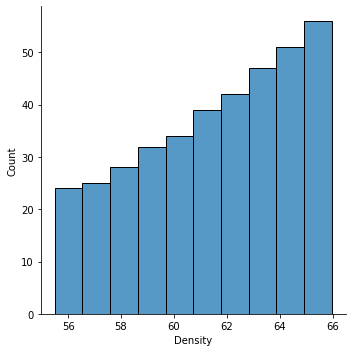

In [38]:
sns.displot(visco_density['Density'])

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Density'>

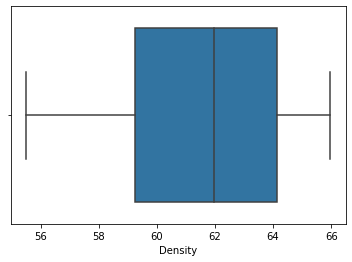

In [39]:
sns.boxplot(visco_density['Density'])

In [40]:
visco_density

,Viscosity,Density
2,1791.4,55.497
3,1787.7,55.544
4,1784.0,55.591
5,1780.4,55.637
6,1776.9,55.684
...,...,...
375,2450.9,65.898
376,2455.6,65.916
377,2460.3,65.934
378,2465.0,65.952


In [41]:
visco_density.iloc[:,0]

2      1791.4
3      1787.7
4      1784.0
5      1780.4
6      1776.9
        ...  
375    2450.9
376    2455.6
377    2460.3
378    2465.0
379    2469.8
Name: Viscosity, Length: 378, dtype: float64

In [42]:
visco_density.iloc[:,1]

2      55.497
3      55.544
4      55.591
5      55.637
6      55.684
        ...  
375    65.898
376    65.916
377    65.934
378    65.952
379    65.970
Name: Density, Length: 378, dtype: float64

In [43]:
X = visco_density['Viscosity'].to_numpy().reshape(-1, 1)
y = visco_density['Density'].to_numpy().reshape(-1, 1)

In [44]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [45]:
X.ndim, X.shape

(2, (378, 1))

In [46]:
y.ndim, y.shape

(2, (378, 1))

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
X_train.ndim, X_train.shape

(2, (302, 1))

In [52]:
y_train.ndim, y_train.shape

(2, (302, 1))

In [53]:
X_test.ndim, y_test.shape

(2, (76, 1))

In [54]:
y_test.ndim, y_test.shape

(2, (76, 1))

In [55]:
X_test[-1]

array([1780.4])

In [56]:
y_test[-1]

array([55.637])

In [57]:
lr.predict(X_test[[1]])

array([[60.4679184]])

In [58]:
#Linear Regresion Model for Density Prediction

In [59]:
#Linear Regresion Model for Density Prediction
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('fluid.txt', sep='\t')
df = df.iloc[2:,:]

visco_density = df[['Viscosity (uPa*s)', 'Density (mol/l)']]
visco_density.columns = ['Viscosity', 'Density']

X = visco_density['Viscosity'].to_numpy().reshape(-1, 1)
y = visco_density['Density'].to_numpy().reshape(-1, 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()

start= time.time()
lr.fit(X_train, y_train)
print(time.time() - start)

y_pred = lr.predict(X_test)

print(lr.predict([X_test[0]]))

#Accuracy calculatiuons

0.002000570297241211
[[59.21791574]]


In [93]:
# Accuracy calculatiuons
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
# Gives the error in same unit as of output column as inthis case of density(mol/l)
# Predicted value as error of 1.4203652383146432 (mol/l) as of actucal value of density.
# Advantage is that MAE can handle the errors better as compared to other errors (Roboust for Outliers)
# MAE = (|y1 - y^1| + |y2 - y^2| + ... + |yn - y^n|)/n

# Mean Squared Error:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# Mean Squared Error is same as MAE but it is more differaciable at Zero, where MAE is not.
# Out out is in Squared unit.
# MSE More penalised at outliner (not Roboust to Outliners)

# Root Mean Squared Error:
print("Root Mean Squared Error: ", np.sqrt(mean_absolute_error(y_test, y_pred)))
# Root Mean Squared Error is same as squared root of MSE 
# Gives the error in same unit as of output column as inthis case of density(mol/l)

# calculating R2 Score
print("R2 Score: ", r2_score(y_test, y_pred))
# R2 Score is also called as coeficient of determination
# if your R2 score is more close to 1 then model is good, if more close to 0 then model is not good
# R2 score tells that, How much your linear regression line is better than mean line
# R2 score tells us that R2 score amount of variance is explained in output column by inpute column

#calculating Adjested R2 Score
r2 = r2_score(y_test, y_pred)
print("Adjusted R2 Score: ", (1 - ((1-r2)*(378-1)))/(378-1-1))

Mean Absolute Error:  1.420365238314642
Mean Squared Error:  3.037506137693109
Root Mean Squared Error:  1.191790769520658
R2 Score:  0.6381645725854281
Adjusted R2 Score:  -0.3601381812108872


In [73]:
temp_visco_density = df[['Temperature (K)', 'Viscosity (uPa*s)', 'Density (mol/l)']]

In [74]:
temp_visco_density.columns = ['Temperature (K)', 'Viscosity (uPa*s)', 'Density (mol/l)']

,Temperature (K),Viscosity (uPa*s),Density (mol/l)
2,273.16,1791.4,55.497
3,273.16,1787.7,55.544
4,273.16,1784.0,55.591
5,273.16,1780.4,55.637
6,273.16,1776.9,55.684
...,...,...,...
375,273.16,2450.9,65.898
376,273.16,2455.6,65.916
377,273.16,2460.3,65.934
378,273.16,2465.0,65.952


In [92]:
#Linear Regresion Model for Density Prediction using Two input columns
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('fluid.txt', sep='\t')
df = df.iloc[2:,:]

temp_visco_density = df[['Temperature (K)', 'Viscosity (uPa*s)', 'Density (mol/l)']]

X = temp_visco_density.iloc[:, 0:2]
y = temp_visco_density.iloc[:,-1].to_numpy().reshape(-1, 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()

start= time.time()
lr.fit(X_train, y_train)
print(time.time() - start)

y_pred = lr.predict(X_test)

# Error and Accuracy calculatiuons
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_absolute_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y_test, y_pred))

#calculating Adjested R2 Score
r2 = r2_score(y_test, y_pred)
print("Adjusted R2 Score: ", (1 - ((1-r2)*(378-1)))/(378-1-1))

0.003997325897216797
Mean Absolute Error:  1.420365238314642
Mean Squared Error:  3.037506137693109
Root Mean Squared Error:  1.191790769520658
R2 Score:  0.6381645725854281
Adjusted R2 Score:  -0.3601381812108872
